In [4]:
import matplotlib.pyplot as plt
from astropy.io import fits as pyfits
import numpy as np
from matplotlib import rcParams
import sys
from utils_CR import CR

# Plot of CR density as a function of the galactic radius (R) in the galactic plane (z=0)

In [2]:
def read_fits_pHelep(inpfile):

    print(inpfile)
    hdulist = pyfits.open(inpfile)
    #print(hdulist.info() )
    prihdr = hdulist[0].header  # the primary header
    #print(prihdr)
    ##print(hdulist[1].header)
    n_ext  = len(hdulist)
   
    table_header = hdulist[0].header     # header attribute of TABLE 
    
    zmin   = table_header['zmin']
    zmax   = table_header['zmax']
    rmin   = table_header['rmin']
    rmax   = table_header['rmax']
    izsun  = table_header['izsun']
    irsun  = table_header['irsun']
    dimz   = table_header['dimz']
    dimr   = table_header['dimr']
    robs   = table_header['robs']
    zobs   = table_header['zobs']
    
    rvec = np.linspace(rmin, rmax, dimr)
    zvec = np.linspace(zmin, zmax, dimz)

    emin   = table_header['ekmin']
    ek_fac = table_header['ekin_fac']
    dimE   = table_header['dimE']

    E = [emin*(ek_fac**i) for i in range(0,dimE)]
    E = np.array(E)
    print(rvec[irsun], zvec[izsun], irsun, izsun, dimE, emin, max(E))


    table_H1_P, table_H1_S, table_H2, table_H3 = [], [], [], []
    table_He3, table_He4 = [], []
    for i in range(1,n_ext): #points in the list         
    
        if hdulist[i].header['A'] == 1 and hdulist[i].header['Z_'] == 1 and hdulist[i].header['SEC'] == 0 :
            table_H1_P.append(hdulist[i].data)
        elif hdulist[i].header['A'] == 1 and hdulist[i].header['Z_'] == 1 and hdulist[i].header['SEC'] == 1 :
            table_H1_S.append(hdulist[i].data)
            
        elif hdulist[i].header['A'] == 2 and hdulist[i].header['Z_'] == 1 :
            table_H2.append(hdulist[i].data)
        elif hdulist[i].header['A'] == 3 and hdulist[i].header['Z_'] == 1 :
            table_H3.append(hdulist[i].data)
            
        elif hdulist[i].header['A'] == 4 and hdulist[i].header['Z_'] == 2 :
            table_He4.append(hdulist[i].data)
        elif hdulist[i].header['A'] == 3 and hdulist[i].header['Z_'] == 2 :
            table_He3.append(hdulist[i].data)
   

    table_H1 = (np.array(table_H1_P) + np.array(table_H1_S) + np.array(table_H2) + np.array(table_H3))[0]
    table_He = (np.array(table_He3) + np.array(table_He4))[0]

    return E, izsun, irsun, rvec, zvec, table_H1, table_He

In [3]:
Myinpfile = "BaseModel_DRAGONxsec.fits.gz"
E,  izsun, irsun, rvec, zvec, table_H1, table_He = read_fits_pHelep(Myinpfile)

BaseModel_DRAGONxsec.fits.gz
8.200000000000001 0.0 41 40 74 0.01 118694.59682199749


In this example, the simulated density of CR particles around the Galaxy mainly depend on the distribution of sources (\< SNR \>), that is set here to be the $\textbf{Ferriere distribution}$. The rest of terms that we set (diffusion coefficient, reacceleration, advection) are spatially constant!

Energy losses, fragmentation and creation of secondary CRs (since the gas density depends on the position in the Galaxy) also have an effect of the distribution of CR particles.

## Proton

In [5]:
HHe_folder = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/prot&Hel/'

In [6]:
data = HHe_folder +  'prot_AMS_2011-2013.dat'
Emeanp, Emeanp_low, Emeanp_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxp, fluxp_low, fluxp_up = np.loadtxt(data,skiprows=0,usecols=(3, 8, 9), unpack=True)
errfluxp = (fluxp_low + fluxp_up)/2

data = HHe_folder + 'p_flux_ATIC2009.txt'
EmeanAT, EmeanAT_low, EmeanAT_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxAT, fluxAT_low, fluxAT_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
errfluxAT = (fluxAT_low + fluxAT_up)/2

data = HHe_folder + 'p_flux_CREAMIII_ApJ2017.txt'
EmeanCR, EmeanCR_low, EmeanCR_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxCR, fluxCR_low, fluxCR_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
errfluxCR = (fluxCR_low + fluxCR_up)/2

data = HHe_folder + 'DAMPE_protons.txt'
EmeanDA, EmeanDA_low, EmeanDA_up = np.loadtxt(data,skiprows=1,usecols=(1, 0, 2), unpack=True)
fluxDA, fluxDA_low, fluxDA_up = np.loadtxt(data,skiprows=1,usecols=(4, 3, 5), unpack=True)
errfluxDA = (fluxDA_low + fluxDA_up)/2

data = HHe_folder + 'p_CALET_PRL2019.txt'
EmeanCA, EmeanCA_low, EmeanCA_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxCA, fluxCA_low, fluxCA_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
errfluxCA = (fluxCA_low + fluxCA_up)/2

data = HHe_folder + 'Protons_NUCLEON.txt'
EmeanNu, fluxNu, stat, sys = np.loadtxt(data, skiprows=0,usecols=(0, 1, 2, 3), unpack=True)
errfluxNu = (sys**2 + stat**2)

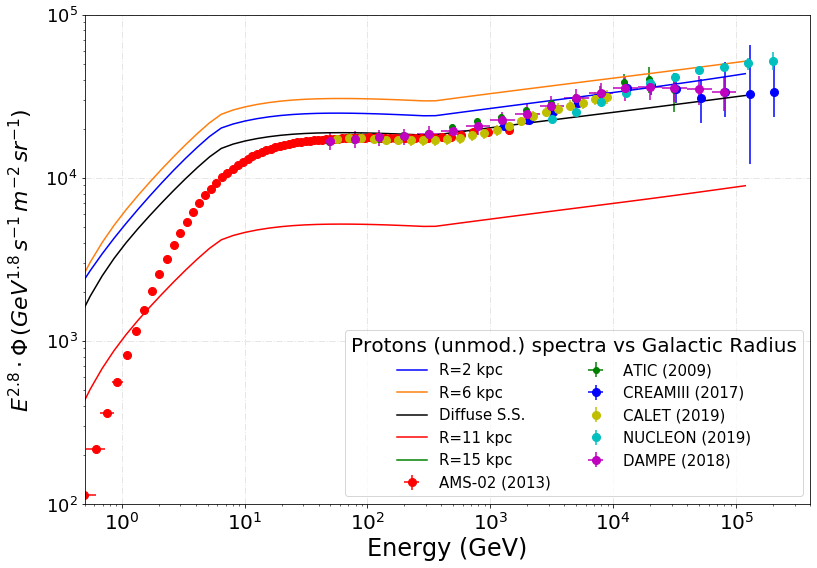

In [8]:
    #####################################      H plot       #######################################################
    
fig1, ax = plt.subplots( figsize=(13,9), edgecolor='blue', facecolor = 'w')

plt.yscale('log')
plt.xscale('log')

slope = 2.8
plt.errorbar(Emeanp, fluxp*np.power(Emeanp, slope), xerr = [(Emeanp-Emeanp_low)/Emeanp, (Emeanp_up-Emeanp)/Emeanp], yerr = [fluxp_low*np.power(Emeanp, slope), fluxp_up*np.power(Emeanp, slope)], ms = 8, fmt= 'ro', label = r"AMS-02 (2013)") 

plt.errorbar(EmeanAT, fluxAT*np.power(EmeanAT, (slope-2.7)), xerr = [(EmeanAT-EmeanAT_low)/EmeanAT, (EmeanAT_up-EmeanAT)/EmeanAT], yerr = [fluxAT_low*np.power(EmeanAT, (slope-2.7)), fluxAT_up*np.power(EmeanAT, (slope-2.7))], ms = 6, fmt= 'go', label = r"ATIC (2009)")

plt.errorbar(EmeanCR, fluxCR*np.power(EmeanCR, slope), xerr = [(EmeanCR-EmeanCR_low)/EmeanCR, (EmeanCR_up-EmeanCR)/EmeanCR], yerr = [fluxCR_low*np.power(EmeanCR, slope), fluxCR_up*np.power(EmeanCR, slope)], ms = 8, fmt= 'bo', label = r"CREAMIII (2017)") 

plt.errorbar(EmeanCA, fluxCA*np.power(EmeanCA, slope-2.8), yerr = [(fluxCA_low)*np.power(EmeanCA, slope-2.8), (fluxCA_up)*np.power(EmeanCA, slope-2.8)], ms = 8, fmt= 'yo', label = r"CALET (2019)")

plt.errorbar(EmeanNu, fluxNu*np.power(EmeanNu, slope), yerr = (errfluxNu/fluxNu)*np.power(EmeanNu, slope), ms = 8, fmt= 'co', label = r"NUCLEON (2019)") 

plt.errorbar(EmeanDA, fluxDA*np.power(EmeanDA, slope), xerr = [(EmeanDA-EmeanDA_low), (EmeanDA_up-EmeanDA)], yerr = [(-fluxDA_low+fluxDA)*np.power(EmeanDA, slope), (fluxDA_up-fluxDA)*np.power(EmeanDA, slope)], ms = 8, fmt= 'mo', label = r"DAMPE (2018)")


plt.plot(E, table_H1[izsun, (np.abs(rvec - 2)).argmin()]*np.power(E, slope), 'b-', label = "R=2 kpc")

plt.plot(E, table_H1[izsun, (np.abs(rvec - 6)).argmin()]*np.power(E, slope), 'C1-', label = "R=6 kpc")

plt.plot(E, table_H1[izsun, irsun]*np.power(E, slope), "k-", label = "Diffuse S.S.") 

plt.plot(E, table_H1[izsun, (np.abs(rvec - 11)).argmin()]*np.power(E, slope), 'r-', label = "R=11 kpc")

plt.plot(E, table_H1[izsun, (np.abs(rvec - 15)).argmin()]*np.power(E, slope), 'g-', label = "R=15 kpc")


lg = ax.legend(fontsize = 15, loc = 0, ncol = 2, title = 'Protons (unmod.) spectra vs Galactic Radius')
lg.get_title().set_fontsize(20)

ax.set_ylabel(r"$E^{2.8} \cdot \Phi \, (GeV^{1.8} \, s^{-1} \, m^{-2} \, sr^{-1})$", fontsize = 22, labelpad = 10)
ax.set_xlabel("Energy (GeV)", fontsize = 24)
ax.set_xlim(left = 0.5, right = 4e5)
ax.set_ylim(bottom = 1e2, top = 1e5) 
ax.grid(color = '0.9', linestyle='-.', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)

#plt.savefig("/mnt/c/Users/pedro/OneDrive/Escritorio/Proton_spectrum.png")
#plt.savefig("/mnt/c/Users/pedro/OneDrive/Escritorio/Proton_spectrum.pdf")
plt.show()
plt.close()

## Helium

In [7]:
data = HHe_folder + 'He_AMS_2011-2013.dat'
EmeanHe, EmeanHe_low, EmeanHe_up = np.loadtxt(data,skiprows=0,usecols=(0,1, 2), unpack = True)
fluxHe, fluxHe_low, fluxHe_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)    
errfluxHe = (fluxHe_low + fluxHe_up)/2

data = HHe_folder + 'He_flux_ATIC_2009.txt'
EmeanHeA, EmeanHeA_low, EmeanHeA_up = np.loadtxt(data,skiprows=0,usecols=(0,1, 2), unpack = True)
fluxHeA, fluxHeA_low, fluxHeA_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)    
errfluxHeA = (fluxHeA_low + fluxHeA_up)/2

data = HHe_folder + 'DAMPE_He_2021.txt'
EmeanHeDA, EmeanHeDA_low, EmeanHeDA_up = (np.loadtxt(data,skiprows=0,usecols=(2, 0, 1), unpack = True)*1e3)/4
fluxHeDA, statDA, analDA, hadDA = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5, 6), unpack=True)*np.loadtxt(data,skiprows=0,usecols=(7), unpack = True)*4
errfluxHeDA = np.sqrt(statDA**2 + analDA**2 + hadDA**2)

data = HHe_folder + 'He_flux_CREAMIII_ApJ2017.txt'
EmeanHeC, EmeanHeC_low, EmeanHeC_up = np.loadtxt(data,skiprows=0,usecols=(0,1, 2), unpack = True)
fluxHeC, fluxHeC_low, fluxHeC_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)    
errfluxHeC = (fluxHeC_low + fluxHeC_up)/2

data = HHe_folder + 'He_NUCLEON.txt'
EmeanNuHe, fluxNuHe, Hestat, Hesys = np.loadtxt(data, skiprows=0,usecols=(0, 1, 2, 3), unpack=True)
errfluxNuHe = (Hesys**2 + Hestat**2)

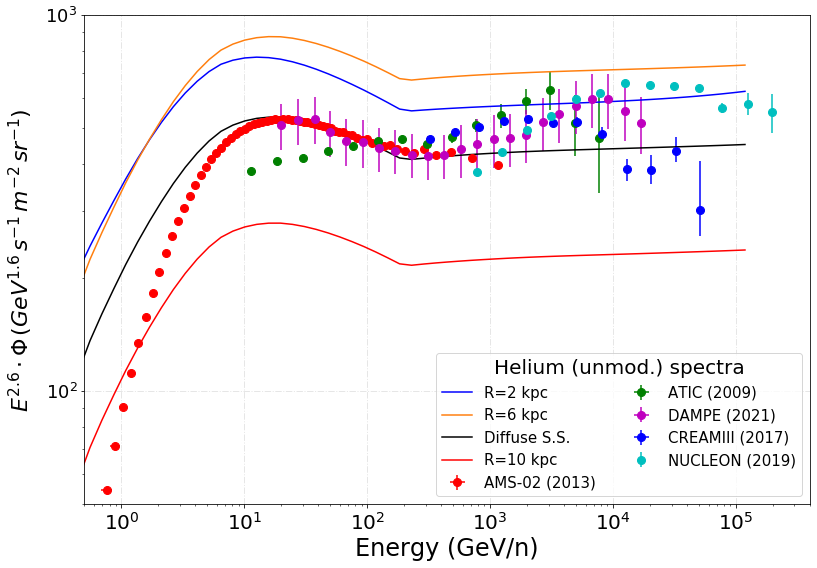

In [13]:
    #####################################      He plot       ######################################################
    
fig1, ax = plt.subplots( figsize=(13,9), edgecolor='blue', facecolor = 'w')

plt.yscale('log')
plt.xscale('log')

slope = 2.6
plt.errorbar(EmeanHe, fluxHe*np.power(EmeanHe, slope), xerr = [(EmeanHe-EmeanHe_low)/EmeanHe, (EmeanHe_up-EmeanHe)/EmeanHe], yerr = [fluxHe_low*np.power(EmeanHe, slope), fluxHe_up*np.power(EmeanHe, slope)], ms = 8, fmt= 'ro', label = r"AMS-02 (2013)")

plt.errorbar(EmeanHeA, fluxHeA*np.power(EmeanHeA, slope), xerr = [(EmeanHeA-EmeanHeA_low)/EmeanHeA, (EmeanHeA_up-EmeanHeA)/EmeanHeA], yerr = [fluxHeA_low*np.power(EmeanHeA, slope), fluxHeA_up*np.power(EmeanHeA, slope)], ms = 8, fmt= 'go', label = r"ATIC (2009)")

plt.errorbar(EmeanHeDA, fluxHeDA*np.power(EmeanHeDA, slope), xerr = [(EmeanHeDA-EmeanHeDA_low)/EmeanHeDA, (EmeanHeDA_up-EmeanHeDA)/EmeanHeDA], yerr = errfluxHeDA*np.power(EmeanHeDA, slope), ms = 8, fmt= 'mo', label = r"DAMPE (2021)")

plt.errorbar(EmeanHeC, fluxHeC*np.power(EmeanHeC, slope), xerr = [(EmeanHeC-EmeanHeC_low)/EmeanHeC, (EmeanHeC_up-EmeanHeC)/EmeanHeC], yerr = [fluxHeC_low*np.power(EmeanHeC, slope), fluxHeC_up*np.power(EmeanHeC, slope)],  ms = 8, fmt= 'bo', label = r"CREAMIII (2017)") #Real data

plt.errorbar(EmeanNuHe/4, 4*fluxNuHe*np.power(EmeanNuHe/4, slope), yerr = (errfluxNuHe/fluxNuHe)*np.power(EmeanNuHe/4, slope), ms = 8, fmt= 'co', label = r"NUCLEON (2019)") 

plt.plot(E, table_He[izsun, (np.abs(rvec - 2)).argmin()]*np.power(E, slope), 'b-', label = "R=2 kpc")

plt.plot(E, table_He[izsun, (np.abs(rvec - 6)).argmin()]*np.power(E, slope), 'C1-', label = "R=6 kpc")

plt.plot(E, table_He[izsun, irsun]*np.power(E, slope), "k-", label = "Diffuse S.S.") 

plt.plot(E, table_He[izsun, (np.abs(rvec - 10)).argmin()]*np.power(E, slope), 'r-', label = "R=10 kpc")

lg = ax.legend(fontsize = 15, loc = 0, ncol = 2, title = 'Helium (unmod.) spectra')
lg.get_title().set_fontsize(20)

ax.set_ylabel(r"$E^{2.6} \cdot \Phi \, (GeV^{1.6} \, s^{-1} \, m^{-2} \, sr^{-1})$", fontsize = 22, labelpad = 10)
ax.set_xlabel("Energy (GeV/n)", fontsize = 24)
ax.set_xlim(left = 0.5, right = 4e5)
ax.set_ylim(bottom = 50, top = 1.e3) 
ax.grid(color = '0.9', linestyle='-.', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)

#plt.savefig("C:/Users/pedro/OneDrive/Escritorio/He_spectrum.png")
#plt.savefig("C:/Users/pedro/OneDrive/Escritorio/He_spectrum.pdf")
plt.show()
plt.close()